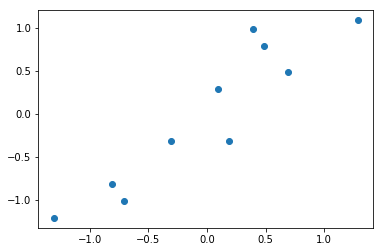

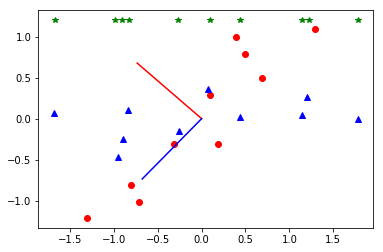

In [15]:
#-*-coding:utf-8-*-
#pca的计算过程
import numpy as np
import matplotlib.pyplot as plt
x=np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
y=np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])
#归一化数据
scaled_x=x-np.mean(x)
scaled_y=y-np.mean(y)
data=np.matrix([[scaled_x[i],scaled_y[i]] for i in range(len(scaled_x))])

plt.plot(scaled_x,scaled_y,'o') 
plt.show()

#求解协方差矩阵
cov=np.cov(scaled_x,scaled_y)
#求协方差矩阵的特征值和特征向量
eig_val, eig_vec = np.linalg.eig(cov)

eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
eig_pairs.sort(reverse=True)
feature=eig_pairs[0][1]
new_data=np.transpose(np.dot(eig_vec,np.transpose(data)))

plt.plot(scaled_x,scaled_y,'o',color='red')
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='red')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='blue')
plt.plot(new_data[:,0],new_data[:,1],'^',color='blue')
plt.plot(new_data_reduced[:,0],[1.2]*10,'*',color='green')

plt.show()

In [21]:
#-*-coding:utf-8-*-
import numpy as np
def pca(X,k):#k is the components you want
  #计算均值
  n_samples, n_features = X.shape
  mean=np.array([np.mean(X[:,i]) for i in range(n_features)])
  #归一化
  norm_X=X-mean
  #计算协方差矩阵
  scatter_matrix=np.dot(np.transpose(norm_X),norm_X)
  #计算协方差矩阵的特征值和特征向量
  eig_val, eig_vec = np.linalg.eig(scatter_matrix)
  eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n_features)]
  # 将特征向量按照特征值大小顺序排列
  eig_pairs.sort(reverse=True)
  # 选择top k特征值对应的特征向量
  feature=np.array([ele[1] for ele in eig_pairs[:k]])
  #返回新的数据
  data=np.dot(norm_X,np.transpose(feature))
  return data

from sklearn.decomposition import PCA
X = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca1=PCA(n_components=1)
pca1.fit(X)
print("pca1:")
print(pca1.transform(X))
pca2=pca(X,1)
print("pca2:")
print(pca2)

pca1:
[[ 0.50917706]
 [ 2.40151069]
 [ 3.7751606 ]
 [-1.20075534]
 [-2.05572155]
 [-3.42937146]]
pca2:
[[-0.50917706]
 [-2.40151069]
 [-3.7751606 ]
 [ 1.20075534]
 [ 2.05572155]
 [ 3.42937146]]
